In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [2]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.06864865320360049, 0.06466482178091001, 0.0765668452887428, 0.06745364936424851, 0.06876951443882764, 0.06969359949415735, 0.07123675059564775, 0.06620253346509514, 0.061275686429373345, 0.07626861470564308]
    Error u of fuhe active learning(LHS sampling): 6.907807e-02
    [0.01902429916366566, 0.017955032333844285, 0.02153820793556744, 0.018003818052947197, 0.01923012833923408, 0.019735321142662958, 0.018607539949850153, 0.017920601543263255, 0.015994058528836147, 0.02063921490561385]
    MAE of fuhe active learning(LHS sampling): 1.886482e-02
    [0.0013132559041363308, 0.0011735655715992906, 0.0016485872656403307, 0.0012595695449348192, 0.0013212923429835415, 0.001363448617654228, 0.0013991169599718621, 0.0012147940649284172, 0.0010354440496524381, 0.0016125689294354867]
    MSE of fuhe active learning(LHS sampling): 1.334164e-03
    """,
    'Xianxing': """
    [0.06852419233971868, 0.06464373859804476, 0.07665281949833185, 0.06736493689675266, 0.06880733609087322, 0.0697171118036674, 0.07124437647766863, 0.06620211096012475, 0.06128471396042326, 0.07632321383581472]
    Error u of fuhe active learning(LHS sampling): 6.907646e-02
    [0.01898393911347987, 0.017946821810707798, 0.02155744570525317, 0.017975915731944816, 0.01924021560179204, 0.01973989855269066, 0.018606331102924492, 0.017918386760216707, 0.015992832817550262, 0.0206508702789525]
    MAE of fuhe active learning(LHS sampling): 1.886127e-02
    [0.0013084197368409725, 0.0011727558140872858, 0.001652138239717918, 0.0012562209632056736, 0.0013227351468987375, 0.0013642922250623653, 0.0013993503172451192, 0.0012147342382498063, 0.0010357096359913313, 0.001614804824885969]
    MSE of fuhe active learning(LHS sampling): 1.334116e-03
    """,
    'Active': """
    [0.06471282492446725, 0.06579646235156926, 0.0775221172111488, 0.07417570763765051, 0.06913580961756352, 0.06308043558184787, 0.06996572440349404, 0.06694019088846719, 0.05918052279257723, 0.07780682692205425]
    Error u of fuhe active learning(LHS sampling): 6.883166e-02
    [0.01842928094007557, 0.018130949245784945, 0.022175805377400677, 0.019378726788399775, 0.018737712877614453, 0.01832537583904053, 0.018247722751304443, 0.018667568695098967, 0.015493189964128986, 0.02150579316052136]
    MAE of fuhe active learning(LHS sampling): 1.890921e-02
    [0.0011753060838444436, 0.0012123058690832029, 0.00169774919277113, 0.0015173926089804037, 0.0013270887493726416, 0.0011256557703739202, 0.0013464792720398646, 0.0012476220255115407, 0.0009652473535859598, 0.0016808616932509758]
    MSE of fuhe active learning(LHS sampling): 1.329571e-03
    """,
    'Chaos': """
    [0.05637167480511314, 0.062425560448479904, 0.0604716447804127, 0.052685539908904774, 0.061342325859195454, 0.059302070222171384, 0.05899091851587859, 0.05854758449640637, 0.05078171487169416, 0.06713231816875961]
    Error u of fuhe active learning(LHS sampling): 5.880514e-02
    [0.01740160617578148, 0.018241008671895285, 0.01946092316818398, 0.016956746895487162, 0.018234979765791328, 0.01876204630379614, 0.017671049222959027, 0.01793768064993687, 0.014895780971368223, 0.02009678360251575]
    MAE of fuhe active learning(LHS sampling): 1.796586e-02
    [0.0009245871230802894, 0.0011109077881203398, 0.0010828230479894404, 0.0008144151142615964, 0.0010759692916859004, 0.0010273884048786687, 0.001001128026240786, 0.0009859742948415046, 0.000730809627958097, 0.0012872205406081552]
    MSE of fuhe active learning(LHS sampling): 1.004122e-03
    """,
    'Chaoschaos': """
    [0.05810088945183207, 0.03435418288150928, 0.06387365422994747, 0.06005319912057207, 0.05393410358825268, 0.051313554117943215, 0.059009028523982786, 0.06092669134686903, 0.05367179656824508, 0.05991670511148053]
    Error u of fuhe active learning(LHS sampling): 5.551538e-02
    [0.01761049153919351, 0.012412426179195465, 0.019846116998470897, 0.018420323432066375, 0.01690904071292721, 0.01678125140876477, 0.017202252859150436, 0.01862061125122954, 0.015679364200597123, 0.018192403166372533]
    MAE of fuhe active learning(LHS sampling): 1.716743e-02
    [0.0009722963227186048, 0.00036858916766793043, 0.0011893896932642634, 0.0010378787113641372, 0.0008475136713739959, 0.0007853283381423895, 0.000986391658382396, 0.0010657389256610113, 0.0008179876473161629, 0.0010340399646783598]
    MSE of fuhe active learning(LHS sampling): 9.105154e-04
    """,
    'Fuhe': """
    [0.031184914964224222, 0.04086709013692555, 0.0345859871004987, 0.04465426872604729, 0.026993288290407647, 0.029182028635653, 0.02885395388845804, 0.039515366140565916, 0.0528824971240818, 0.027448505595786682]
    Error u of fuhe active learning(LHS sampling): 3.561679e-02
    [0.013580018163395312, 0.016406811380316726, 0.016376448009331107, 0.018721691403709013, 0.011053856784011851, 0.012721197144519348, 0.0127745175188863, 0.016342640663968806, 0.020912956177820154, 0.011968897638606047]
    MAE of fuhe active learning(LHS sampling): 1.508590e-02
    [0.00029001854543603007, 0.00046967838633027925, 0.0004204444704567266, 0.0005552531565006843, 0.0002088336345112526, 0.00026056758290182367, 0.0002539317671606865, 0.0004323561510552931, 0.0007593224626114928, 0.00022261432840001572]
    MSE of fuhe active learning(LHS sampling): 3.873020e-04
    """,
    'Fuhechaos': """
    [0.04178209096321973, 0.038969730802764634, 0.04523330703610355, 0.04941498589021243, 0.03803728856599249, 0.03613718698102154, 0.029636654699971537, 0.031246424979469976, 0.06448160906893546, 0.02854791978940282]
    Error u of fuhe active learning(LHS sampling): 4.034872e-02
    [0.017295945791923787, 0.01571232497400011, 0.020535401216478323, 0.0207627623080196, 0.014907288154843134, 0.015323615738631417, 0.013597864144451308, 0.01316008490236597, 0.025251797329312004, 0.01255484196303685]
    MAE of fuhe active learning(LHS sampling): 1.691019e-02
    [0.0004933859375310173, 0.00042727007093416744, 0.0006765950443523428, 0.0006831575658178667, 0.00039314145528772675, 0.0003820453045025932, 0.00027952456462788006, 0.0002686258079456505, 0.0011235275279896338, 0.00024386922263412508]
    MSE of fuhe active learning(LHS sampling): 4.971143e-04
    """,
    'Residual': """
    [0.04216137977410399, 0.06779587155989925, 0.05954760412996706, 0.06556406068317203, 0.07384984481487994, 0.05913385258235882, 0.056108341654346854, 0.06298748426246886, 0.04008197989811536, 0.03960235568490697]
    Error u of fuhe active learning(LHS sampling): 5.668328e-02
    [0.019720546543412442, 0.02646890958705383, 0.026135774645841464, 0.026653257486542074, 0.02736311080870736, 0.026093730256521865, 0.023125329453512783, 0.024825967364426303, 0.020478239892655934, 0.020216506796432297]
    MAE of fuhe active learning(LHS sampling): 2.410814e-02
    [0.0006185071425242308, 0.001244751564731441, 0.0011274097304087463, 0.001158295407828823, 0.001434652496127669, 0.0011403198121485336, 0.0008953414731912398, 0.001063599786832437, 0.0006818291102508512, 0.0006556274884523423]
    MSE of fuhe active learning(LHS sampling): 1.002033e-03
    """,
    '0.9Residual': """
    [0.04527552457050412, 0.07311150995224898, 0.06016461752616515, 0.06585444283179134, 0.07086096664921746, 0.06765458070632681, 0.058542148005002764, 0.06233315540786854, 0.05737078371956547, 0.04835189998770849]
    Error u of fuhe active learning(LHS sampling): 6.095196e-02
    [0.02085911754141901, 0.02794057049140303, 0.026536730059005913, 0.02657789703168187, 0.02673565652255023, 0.025635089509864397, 0.023284191162337625, 0.024590998335826897, 0.024631252520872834, 0.021352534468867004]
    MAE of fuhe active learning(LHS sampling): 2.481440e-02
    [0.0007005020233606365, 0.001459943586395569, 0.0011466843632232915, 0.0011638278094858502, 0.0013215798640183797, 0.001224084574407504, 0.0009393856964422594, 0.0010424382505996113, 0.0009833969763949925, 0.0007317410021930361]
    MSE of fuhe active learning(LHS sampling): 1.071358e-03
    """,
    '0.9Residualchaos': """
    [0.050269407705469754, 0.07342102342934662, 0.058330540084135865, 0.05734446670419899, 0.06934209547683955, 0.07223272216501767, 0.06120056612603626, 0.061292228757884475, 0.04846918451270187, 0.040671357155226275]
    Error u of fuhe active learning(LHS sampling): 5.925736e-02
    [0.020406463554978896, 0.027475675615726496, 0.026254266616489174, 0.022119598200543187, 0.02693632392177114, 0.026677917488092263, 0.024005603301204274, 0.024231222736946667, 0.022586384361435168, 0.020548234526763513]
    MAE of fuhe active learning(LHS sampling): 2.412417e-02
    [0.0007048894488757535, 0.0014346288537834169, 0.0011182962850077827, 0.0008814168941180976, 0.0012780888769347225, 0.0013769736594137511, 0.0010071242707453895, 0.001007908205599835, 0.0008051688696532613, 0.0006855149022208623]
    MSE of fuhe active learning(LHS sampling): 1.030001e-03
    """,
    '0.8Residual': """
    [0.042300645226068176, 0.03278801553912967, 0.056451598619237923, 0.06121276407005465, 0.05054996767138918, 0.0622234763582892, 0.04120161412813884, 0.04372316351740052, 0.0575640702929058, 0.03564452595660299]
    Error u of fuhe active learning(LHS sampling): 4.836598e-02
    [0.019239956537145712, 0.013334893596021058, 0.025859859599609788, 0.024961047958812484, 0.01870607228019594, 0.023730944370078753, 0.01841227373718405, 0.017525512456653, 0.024514225202624723, 0.016363729892014716]
    MAE of fuhe active learning(LHS sampling): 2.026485e-02
    [0.0005888675916801738, 0.0003074210446047654, 0.0010814654236470467, 0.0010153519518116708, 0.0006735588017224085, 0.0010382875351447865, 0.0005418635800192959, 0.0005121973502385828, 0.000979023418723617, 0.00041299324802283063]
    MSE of fuhe active learning(LHS sampling): 7.151030e-04
    """,
    '0.8Residualchaos': """
    [0.044428527530328506, 0.036468188330220766, 0.06106619377194233, 0.06248661777093943, 0.06213574820267475, 0.06288731203709426, 0.0418942779722746, 0.04759652734897339, 0.05192303265605032, 0.039886397731910786]
    Error u of fuhe active learning(LHS sampling): 5.107728e-02
    [0.02034257351881565, 0.014046071895562626, 0.027661753013805346, 0.025181719635574206, 0.023341786645931843, 0.02471159356762191, 0.01907604285253942, 0.01915999611926216, 0.0229764975359059, 0.01842833558215538]
    MAE of fuhe active learning(LHS sampling): 2.149264e-02
    [0.0006694930582071086, 0.00035975148734630877, 0.0012734608478151962, 0.0010497039309603725, 0.001018952797672624, 0.0010788938140356308, 0.0005657799178701528, 0.0006161714306371402, 0.0008449288538095354, 0.000532338917556446]
    MSE of fuhe active learning(LHS sampling): 8.009475e-04
    """,
    '0.7Residual': """
    [0.04152953247617475, 0.039077172826288954, 0.048590949796858095, 0.055223951132442765, 0.04835910510756923, 0.039612551388059775, 0.04629126709638373, 0.04451129626806236, 0.06011146892089806, 0.03567256299330064]
    Error u of fuhe active learning(LHS sampling): 4.589799e-02
    [0.01724816499816396, 0.01632066470892231, 0.02288296331741632, 0.0228939547632726, 0.0179358282866002, 0.016693262343324383, 0.018461145387686055, 0.017932691344703062, 0.024461098183875183, 0.015731914016141532]
    MAE of fuhe active learning(LHS sampling): 1.905617e-02
    [0.0004909180484087677, 0.0004489447690369714, 0.0008660706563926309, 0.0008374011988090212, 0.0006182635107188075, 0.0004589955675280663, 0.0005924968273325471, 0.0005382182015388314, 0.001006088249520669, 0.000390295007539005]
    MSE of fuhe active learning(LHS sampling): 6.247692e-04
    """,
    '0.7Residualcgais': """
    [0.04725012996572678, 0.04683632862679154, 0.05932290517181417, 0.05138705972139175, 0.050506244087002446, 0.05547777879736278, 0.05535559098096852, 0.07132509127293381, 0.062854230680325, 0.030925025417825016]
    Error u of fuhe active learning(LHS sampling): 5.312404e-02
    [0.019179766972821935, 0.01906675354200074, 0.02719793539929762, 0.022128121219964186, 0.01951638697296462, 0.02347485563138122, 0.023100284509169865, 0.028076569513003375, 0.02580683497164964, 0.015210105394253177]
    MAE of fuhe active learning(LHS sampling): 2.227576e-02
    [0.0006209420416124834, 0.0006289974162606679, 0.001209469491223121, 0.0007557105878784947, 0.0006790304636010411, 0.0009183101065473596, 0.0008841376744520078, 0.001348090633295682, 0.001115605638017489, 0.00034670102228438954]
    MSE of fuhe active learning(LHS sampling): 8.506995e-04
    """,
    '0.6Residual': """
    [0.037171633668803945, 0.015201979180121184, 0.03698376859954009, 0.05396921661614513, 0.0369051228200513, 0.034507622238155844, 0.033827514030387675, 0.0361039974502577, 0.05832307601133814, 0.03049055131625053]
    Error u of fuhe active learning(LHS sampling): 3.734845e-02
    [0.015597900424978547, 0.007359299918555662, 0.01726778646869985, 0.022415018906870553, 0.014256392431167659, 0.014588194768074507, 0.01518536671583951, 0.014880374889138029, 0.023162122955495097, 0.012921519428870144]
    MAE of fuhe active learning(LHS sampling): 1.576340e-02
    [0.0003954988050707449, 8.525615962590207e-05, 0.0004737299753444961, 0.0008038551055568471, 0.00036645330221667815, 0.00035434602604960064, 0.0003586135645068446, 0.0003534836188604705, 0.0009286776693410844, 0.0002615846856489751]
    MSE of fuhe active learning(LHS sampling): 4.381499e-04
    """,
    '0.6Residualchaos': """
    [0.042722932669339096, 0.05345934976533038, 0.05187572038919403, 0.05343343053873473, 0.03643447772192459, 0.04342542123613134, 0.049236193906858405, 0.03425582536879331, 0.06901650161627622, 0.02955996308316361]
    Error u of fuhe active learning(LHS sampling): 4.634198e-02
    [0.018041484755043417, 0.0207819118359022, 0.023639353900151483, 0.022531779965140268, 0.014744955149923756, 0.01806724129471899, 0.022001725394609678, 0.013985180389053376, 0.026720552468766083, 0.01348902920706468]
    MAE of fuhe active learning(LHS sampling): 1.940032e-02
    [0.0005255358321489043, 0.0007902506882237634, 0.0008956387471925135, 0.0007992515518696832, 0.000366296949205867, 0.0005520418065672373, 0.0007670458116023404, 0.0003184681738837251, 0.0012749272683344312, 0.00027709468362043557]
    MSE of fuhe active learning(LHS sampling): 6.566552e-04
    """,
    '0.4Residual': """
    [0.02900828461423344, 0.018926118773415934, 0.031224452851994842, 0.04088742425042757, 0.02447959135226555, 0.024680287737611127, 0.02609468930329736, 0.02870378340162083, 0.04369052225570464, 0.024658657612888903]
    Error u of fuhe active learning(LHS sampling): 2.923538e-02
    [0.01268970555113058, 0.009008493559115628, 0.014704239743014515, 0.01714225504254987, 0.010723090362844722, 0.01224216526406464, 0.012331398835492176, 0.012482399257785397, 0.018063456601576065, 0.01124054747153166]
    MAE of fuhe active learning(LHS sampling): 1.306278e-02
    [0.0002522818284244064, 0.000129375896934735, 0.00034535329210061893, 0.00046778555100842565, 0.00018543894489549289, 0.0002224740807345868, 0.0002274966577932843, 0.0002422395210127469, 0.0005425712074405596, 0.00018936456235686997]
    MSE of fuhe active learning(LHS sampling): 2.804382e-04
    """,
    '0.4Residualchaos': """
    [0.035300198661379074, 0.023951012043131794, 0.045784826319633286, 0.04204828127660908, 0.029658443651681094, 0.03455991397667911, 0.03439723483793143, 0.029974409062633673, 0.051876561005837186, 0.023537555142641206]
    Error u of fuhe active learning(LHS sampling): 3.510884e-02
    [0.01511628504336195, 0.010873486870324689, 0.020824111887235406, 0.019240962493223376, 0.012517897160623652, 0.014439301224324635, 0.015205779553541637, 0.012701641520384837, 0.021457791114051477, 0.011110632909444555]
    MAE of fuhe active learning(LHS sampling): 1.534879e-02
    [0.0003641744050249323, 0.00019081663265030048, 0.0006982665986316109, 0.0005541940126100209, 0.0002540360401988466, 0.0003478080607899492, 0.0003622852324509642, 0.0002566183538928218, 0.0007606474658938596, 0.0001801603228651653]
    MSE of fuhe active learning(LHS sampling): 3.969007e-04
    """,
    '0.3Residual': """
    [0.026141304193017523, 0.01661418339063864, 0.02577852956530036, 0.0307004713044251, 0.021339753924310256, 0.024449731731624045, 0.016042158644799732, 0.0225363442052721, 0.03089959853881596, 0.019901497631671494]
    Error u of fuhe active learning(LHS sampling): 2.344036e-02
    [0.011818832088790218, 0.008632199000970175, 0.012628149527129654, 0.013741617092747484, 0.010690023856355223, 0.011751434698775435, 0.009214695396763853, 0.010588623273917866, 0.013904019727831727, 0.009966781330854105]
    MAE of fuhe active learning(LHS sampling): 1.129364e-02
    [0.00021075503787954924, 0.00011587470579596353, 0.0002479905643069172, 0.00028493462263802873, 0.00016991138140582768, 0.00020858339792213907, 0.00011995113869936537, 0.0001656315863685826, 0.0003003096995713219, 0.00014100931412580996]
    MSE of fuhe active learning(LHS sampling): 1.964951e-04
    """,
    '0.3Residualchaos': """
    [0.032277226083983784, 0.020348259270000814, 0.0393333399547211, 0.04201304609746054, 0.02366902915713651, 0.030124109633335654, 0.03389490246332842, 0.024386223133965913, 0.03785120337477405, 0.02166777922401436]
    Error u of fuhe active learning(LHS sampling): 3.055651e-02
    [0.014269572734384877, 0.010016242088808348, 0.017836308970464135, 0.01814197805240745, 0.0106763023071714, 0.013283964597722237, 0.014721841709743307, 0.010766571455601495, 0.01678024458075996, 0.010453395761348292]
    MAE of fuhe active learning(LHS sampling): 1.369464e-02
    [0.000313371902143923, 0.00016076267080124978, 0.0005025753628924279, 0.0005122581808993812, 0.00017604628226521417, 0.00027688227277697575, 0.00034341994416727044, 0.00017333029936484145, 0.000439214079600421, 0.0001592255123537735]
    MSE of fuhe active learning(LHS sampling): 3.057087e-04
    """,
    '0.2Residual': """
    [0.02664925839077495, 0.018856225098607054, 0.022550354390536268, 0.018194858644069438, 0.015598955717128256, 0.0181188348281638, 0.015020342715497712, 0.019612086565867114, 0.020176979769058495, 0.01776373989929533]
    Error u of fuhe active learning(LHS sampling): 1.925416e-02
    [0.01345820301275335, 0.008962006106236198, 0.011352221638956482, 0.010006241407484063, 0.008554351431146134, 0.00980152230106044, 0.008823379200192653, 0.009959222140043317, 0.010548388642701129, 0.009426208941222744]
    MAE of fuhe active learning(LHS sampling): 1.008917e-02
    [0.00026091315621917273, 0.00013943698669055836, 0.00020893269708841114, 0.0001421996042453751, 0.00010912932321613725, 0.00014560466260088865, 0.00010921055345894124, 0.0001477186970163443, 0.00016171573716268313, 0.00013384969257184784]
    MSE of fuhe active learning(LHS sampling): 1.558711e-04
    """,
    '0.2Residualchaos': """
    [0.029779645158931837, 0.019534065853239257, 0.030249119981172305, 0.03769714730507912, 0.019495968785367548, 0.02683667420725303, 0.019542817237555354, 0.02023914247074953, 0.030105541472778285, 0.01945630425073519]
    Error u of fuhe active learning(LHS sampling): 2.529364e-02
    [0.013421607759070257, 0.009595756751697947, 0.014207241024633156, 0.01621956787179259, 0.009041470217747963, 0.012623534520499325, 0.01053420511555756, 0.0096110376710621, 0.014244294764981059, 0.011071549120528911]
    MAE of fuhe active learning(LHS sampling): 1.205703e-02
    [0.0002702828815331621, 0.000149022165654996, 0.00031521940550538653, 0.0004095323338619663, 0.00012992116994624446, 0.00024069773071287262, 0.00015861238034084127, 0.00013684590586915743, 0.0003092571519044298, 0.00017842587832905807]
    MSE of fuhe active learning(LHS sampling): 2.297817e-04
    """,
    '0.1Residual': """
    [0.025901371792350907, 0.0294089397550931, 0.03263808602672131, 0.017002097802265862, 0.029289267205993855, 0.03556187175362761, 0.022810742718974236, 0.016631227781907947, 0.01862889007106652, 0.03257220670529129]
    Error u of fuhe active learning(LHS sampling): 2.604447e-02
    [0.011550955956401678, 0.011790552603610546, 0.012781550479208719, 0.00779984994890152, 0.011466159564380804, 0.012941383032064203, 0.009006822446266834, 0.00833558591124254, 0.008449458130769525, 0.012058184081681694]
    MAE of fuhe active learning(LHS sampling): 1.061805e-02
    [0.00023827673875707938, 0.0002928849761896905, 0.000359622480438235, 9.925579916025407e-05, 0.00028286858751820556, 0.00039811100803808375, 0.0001673471756067649, 0.00011552942031746928, 0.00012333257202649229, 0.0003367126937607558]
    MSE of fuhe active learning(LHS sampling): 2.413941e-04
    """,
    '0.1Residualchaos': """
    [0.028340760946536887, 0.01904828243458646, 0.02299791049123786, 0.020030018118692924, 0.01725637419418852, 0.018400282376464197, 0.015285335832281597, 0.02074830749962586, 0.020133107667503005, 0.01714559105093645]
    Error u of fuhe active learning(LHS sampling): 1.993860e-02
    [0.013763953610850942, 0.00877074160301025, 0.011783559263749195, 0.01041610250184815, 0.00746837163044445, 0.00969564974639776, 0.008890624458420582, 0.010321570039203698, 0.01051045846893788, 0.009381083642826206]
    MAE of fuhe active learning(LHS sampling): 1.010021e-02
    [0.000274989954716922, 0.0001378670144478893, 0.00021941336950364516, 0.0001530518925458608, 0.0001030484912146956, 0.00014219576661117514, 0.00011011365795903473, 0.00015777233191477174, 0.00015974125501281596, 0.00012942465641059122]
    MSE of fuhe active learning(LHS sampling): 1.587618e-04
    """,
}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    
    return error_u, mae, mse

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

              Method   Metric  \
0               PINN  Error_u   
1               PINN      MAE   
2               PINN      MSE   
3           Xianxing  Error_u   
4           Xianxing      MAE   
..               ...      ...   
67       0.1Residual      MAE   
68       0.1Residual      MSE   
69  0.1Residualchaos  Error_u   
70  0.1Residualchaos      MAE   
71  0.1Residualchaos      MSE   

                                               Values  
0   [0.06864865320360049, 0.06466482178091001, 0.0...  
1   [0.01902429916366566, 0.017955032333844285, 0....  
2   [0.0013132559041363308, 0.0011735655715992906,...  
3   [0.06852419233971868, 0.06464373859804476, 0.0...  
4   [0.01898393911347987, 0.017946821810707798, 0....  
..                                                ...  
67  [0.011550955956401678, 0.011790552603610546, 0...  
68  [0.00023827673875707938, 0.0002928849761896905...  
69  [0.028340760946536887, 0.01904828243458646, 0....  
70  [0.013763953610850942, 0.00877074160301

In [3]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Chaos', 'Chaoschaos', 'Fuhe', 'Fuhechaos', 'Residual', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualcgais', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1Residualchaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.06864865320360049, 0.06466482178091001, 0.0765668452887428, 0.06745364936424851, 0.06876951443882764, 0.06969359949415735, 0.07123675059564775, 0.06620253346509514, 0.061275686429373345, 0.07626861470564308], 'Xianxing': [0.06852419233971868, 0.06464373859804476, 0.07665281949833185, 0.06736493689675266, 0.06880733609087322, 0.0697171118036674, 0.07124437647766863, 0.06620211096012475, 0.06128471396042326, 0.07632321383581472], 'Active': [0.06471282492446725, 0.06579646235156926, 0.0775221172111488, 0.07417570763765051, 0.06913580961756352, 0.06308043558184787, 0.069965724

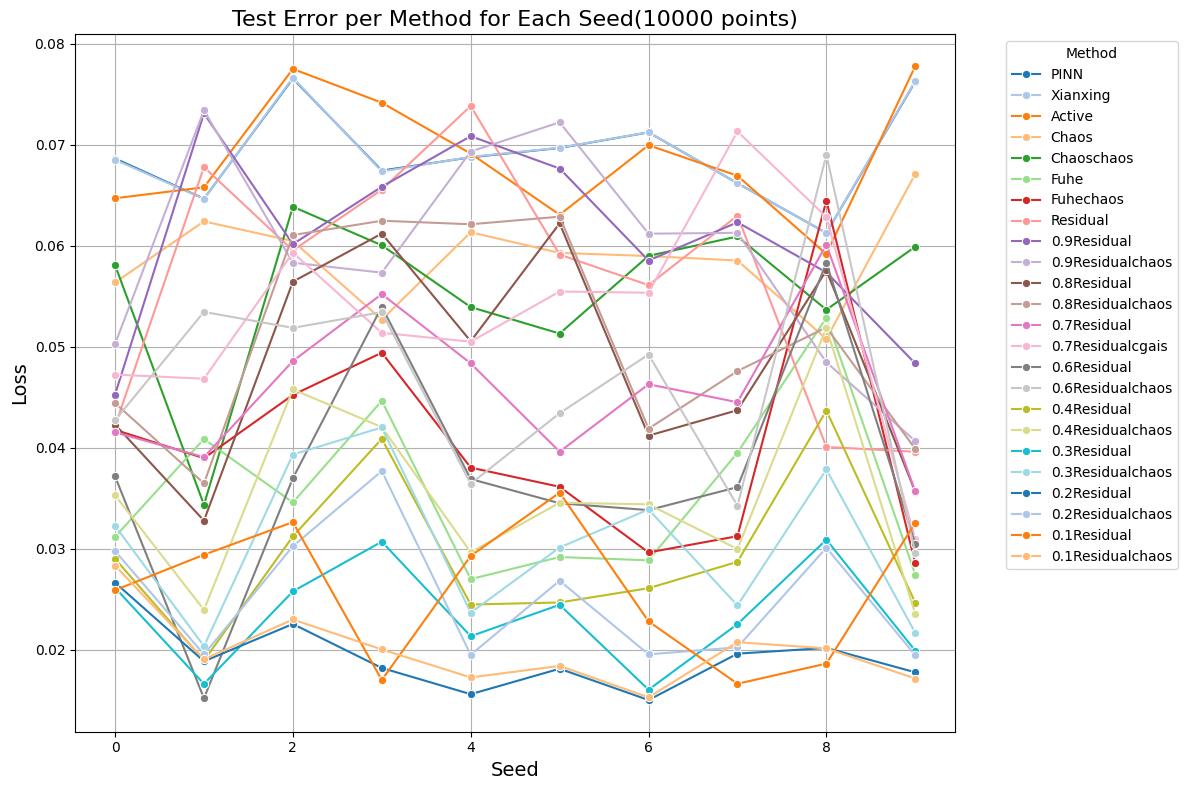

In [4]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 3. 设置图形标题和标签
plt.title('Test Error per Method for Each Seed(10000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

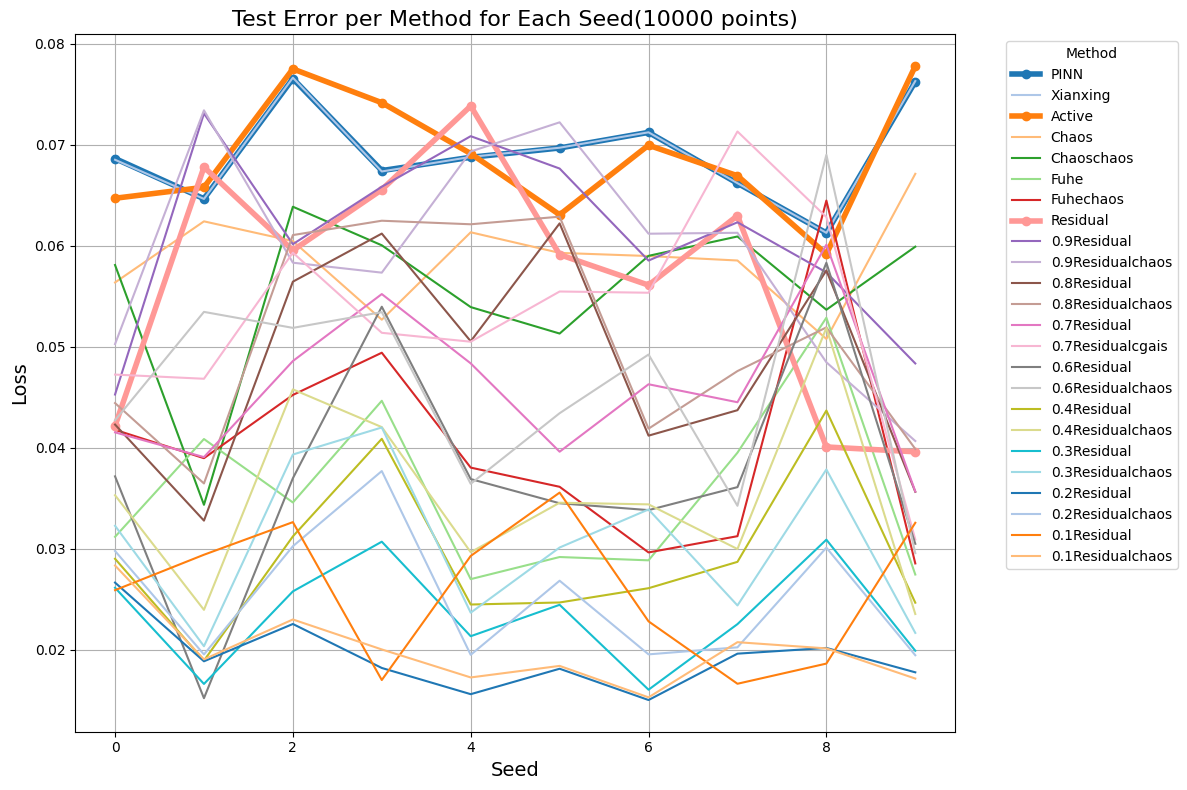

In [5]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 4. 设置图形标题和标签
plt.title('Test Error per Method for Each Seed(10000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\2118892492.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\2118892492.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


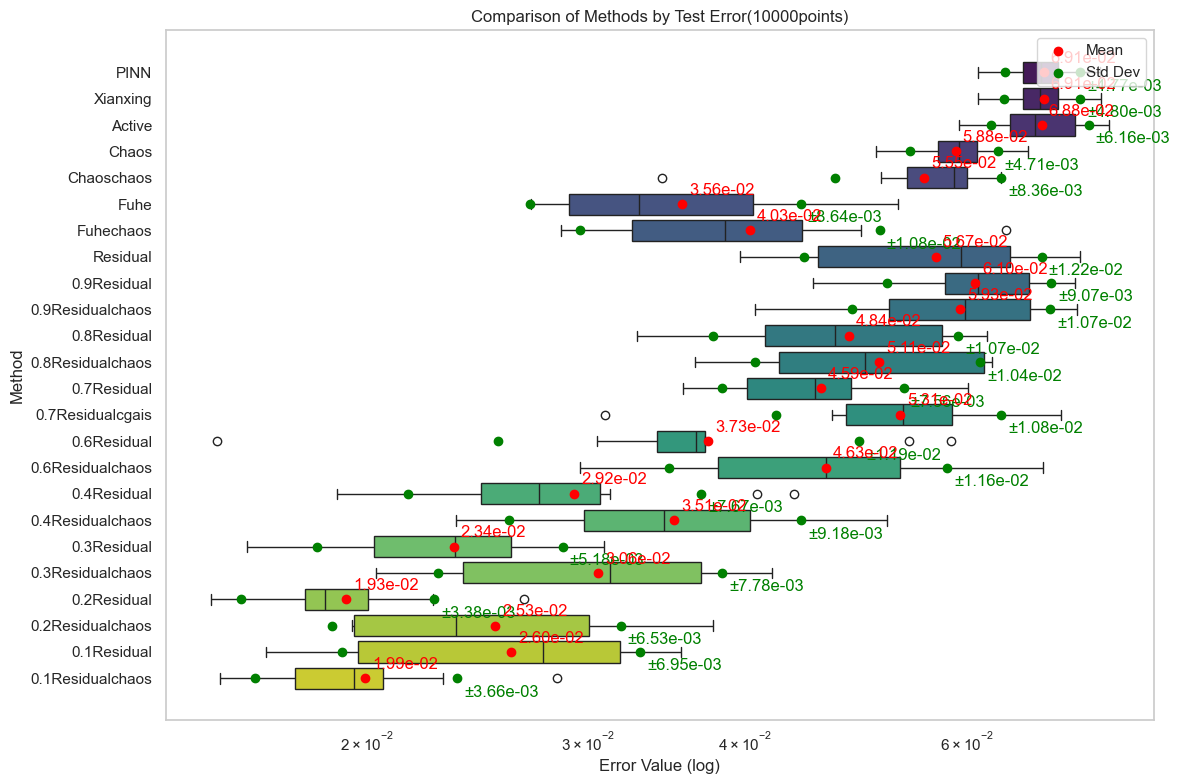

In [6]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(10000points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\2387478127.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\2387478127.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


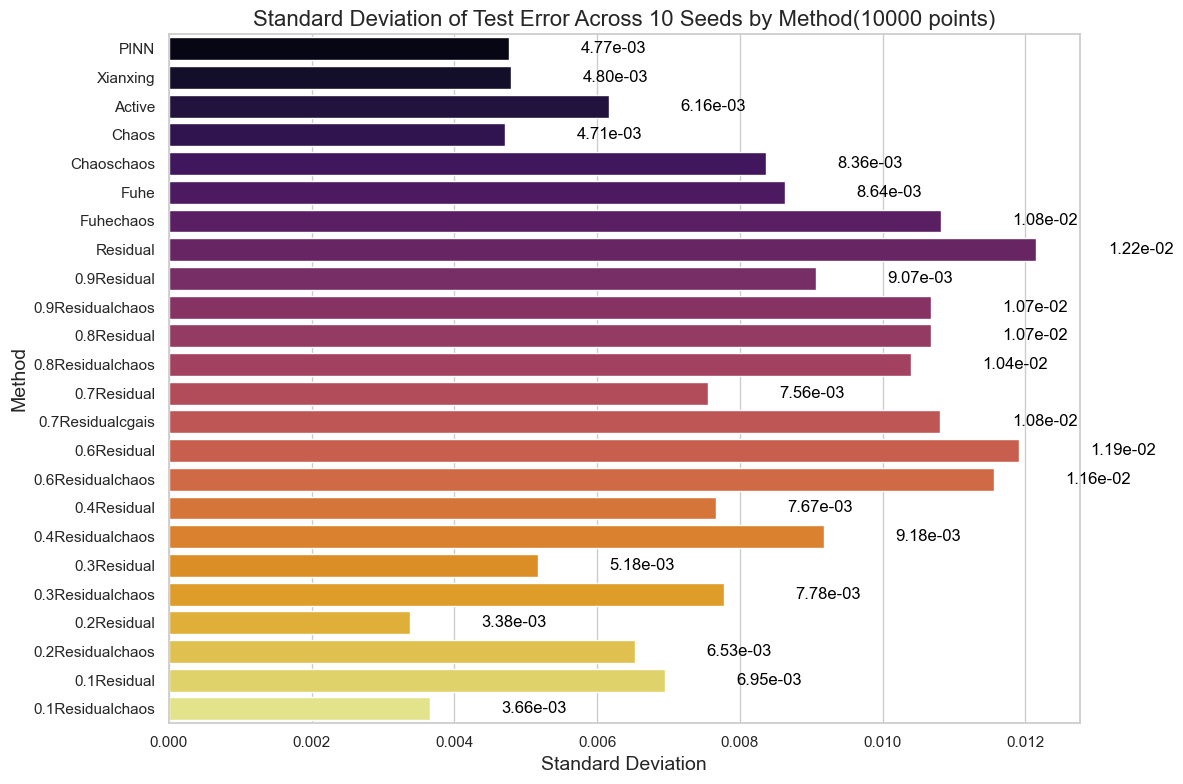

In [7]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)
# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(10000 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

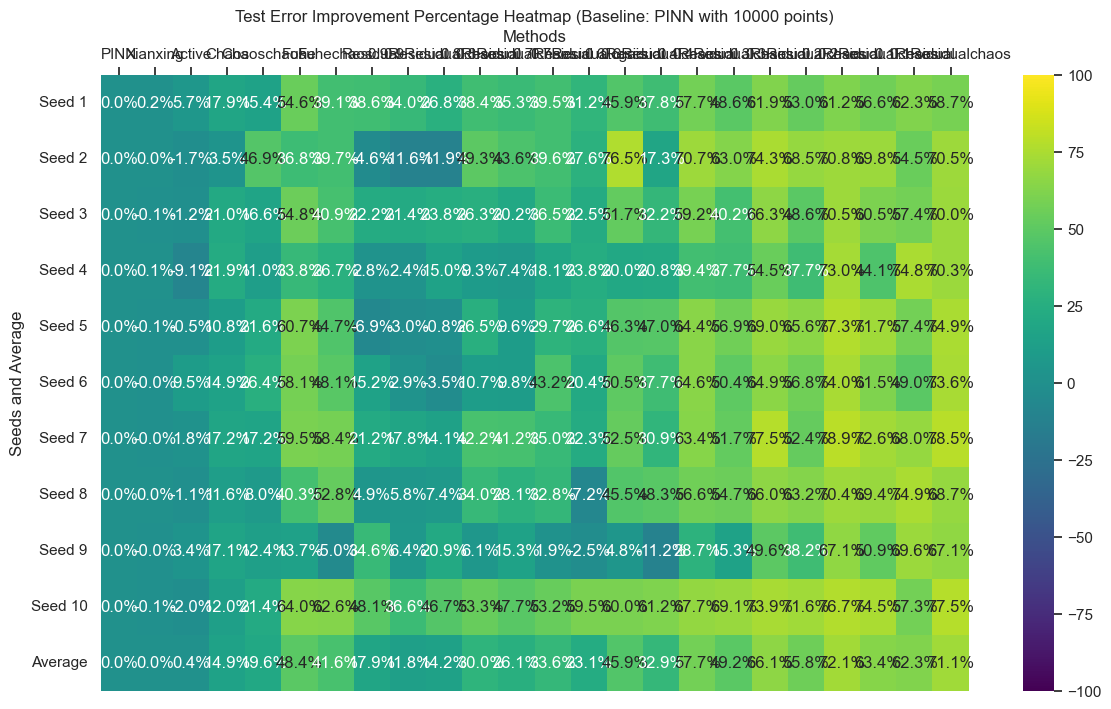

In [8]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



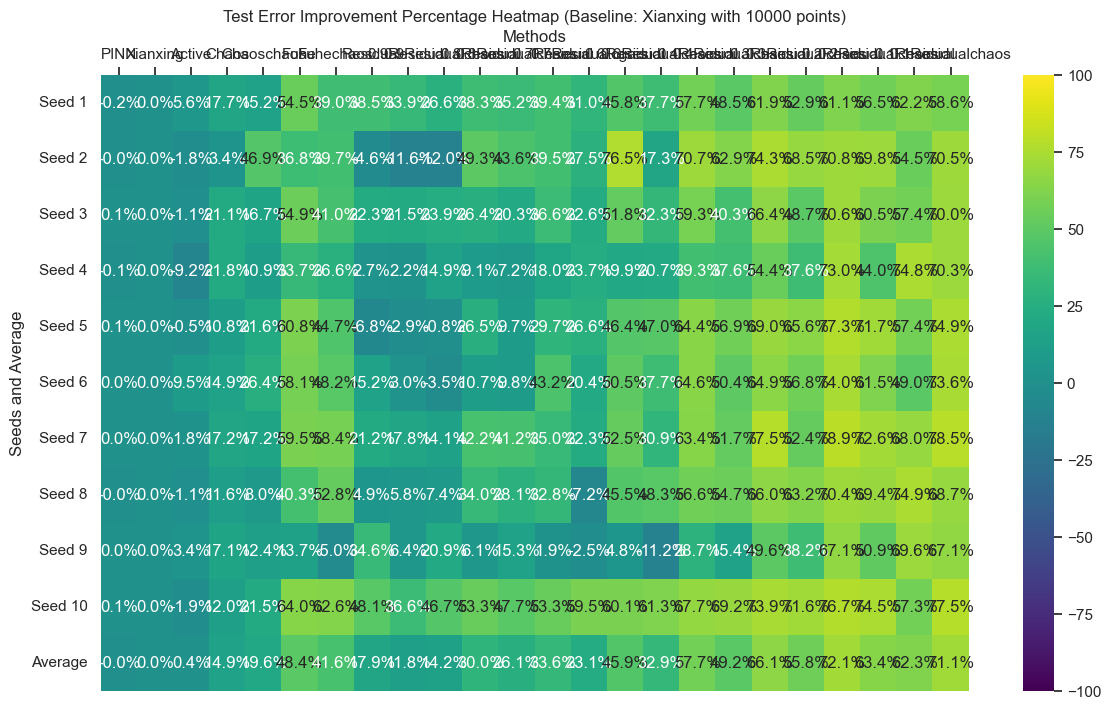

In [9]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



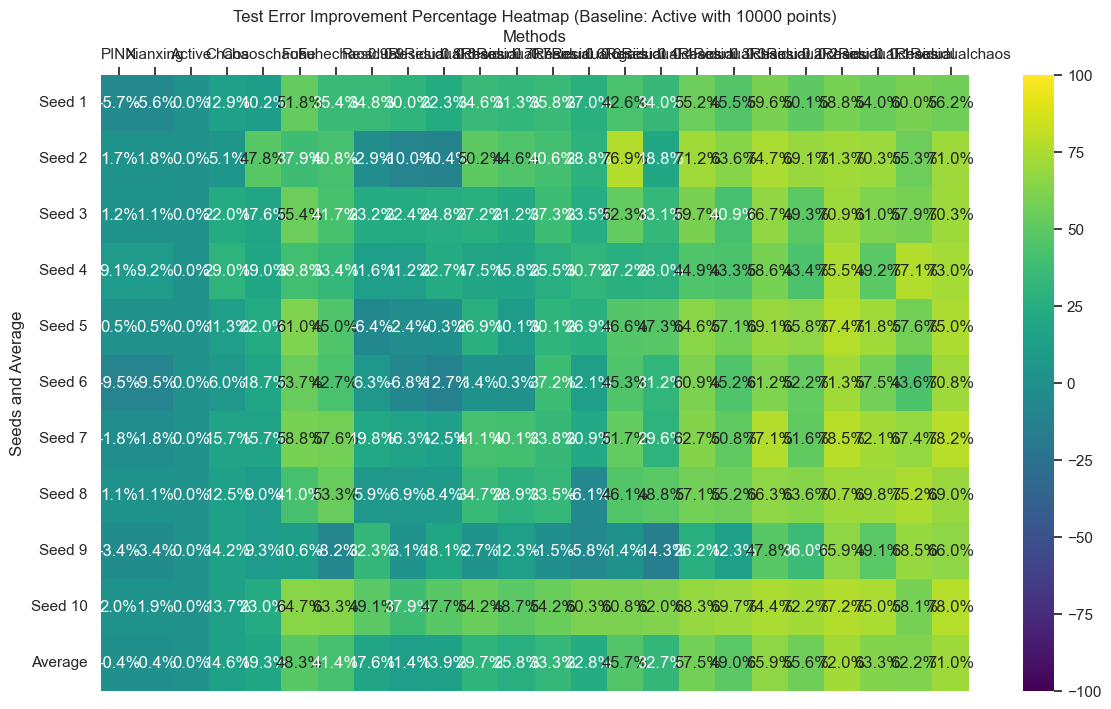

In [10]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



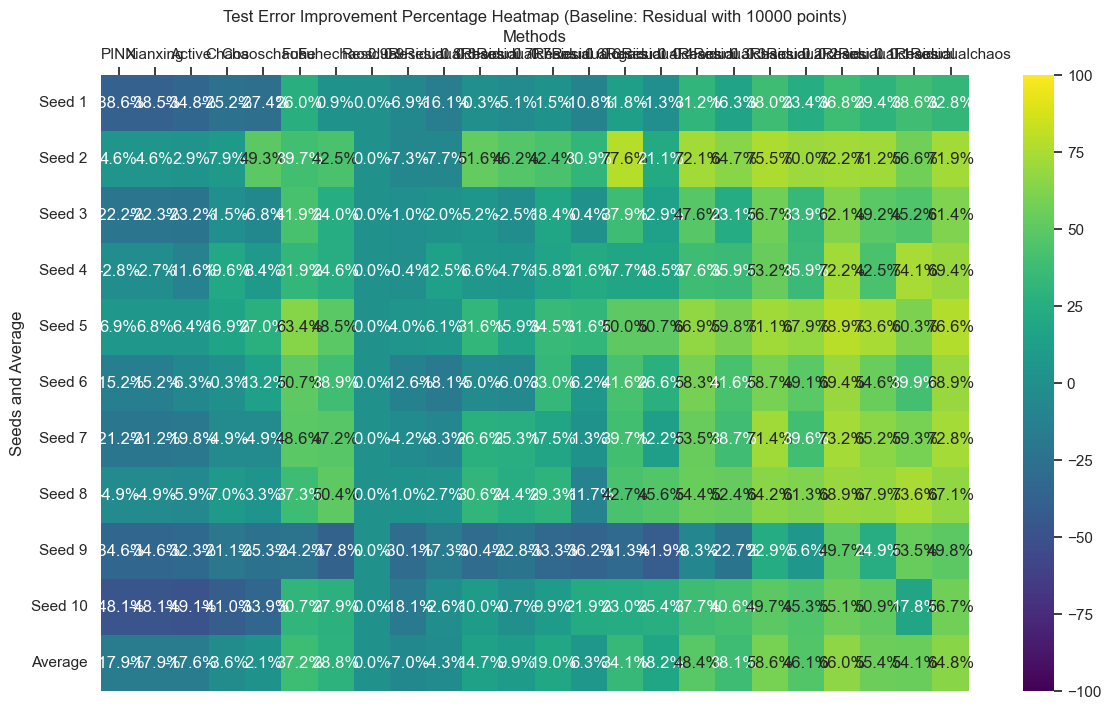

In [11]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



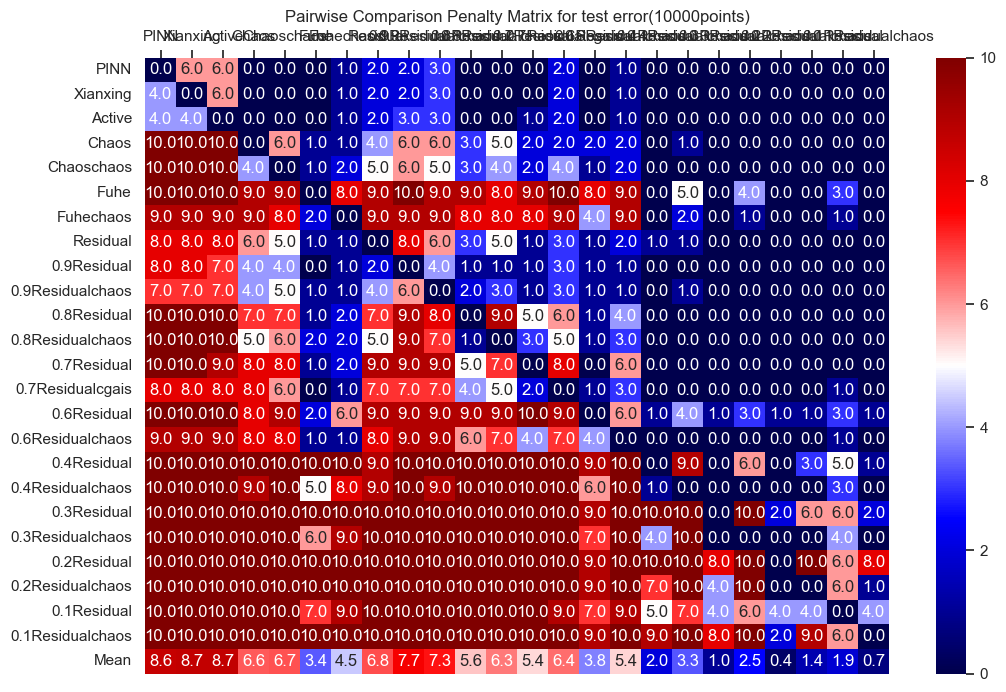

In [12]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for test error(10000points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [13]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Chaos', 'Chaoschaos', 'Fuhe', 'Fuhechaos', 'Residual', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualcgais', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1Residualchaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.01902429916366566, 0.017955032333844285, 0.02153820793556744, 0.018003818052947197, 0.01923012833923408, 0.019735321142662958, 0.018607539949850153, 0.017920601543263255, 0.015994058528836147, 0.02063921490561385], 'Xianxing': [0.01898393911347987, 0.017946821810707798, 0.02155744570525317, 0.017975915731944816, 0.01924021560179204, 0.01973989855269066, 0.018606331102924492, 0.017918386760216707, 0.015992832817550262, 0.0206508702789525], 'Active': [0.01842928094007557, 0.018130949245784945, 0.022175805377400677, 0.019378726788399775, 0.018737712877614453, 0.01832537583904

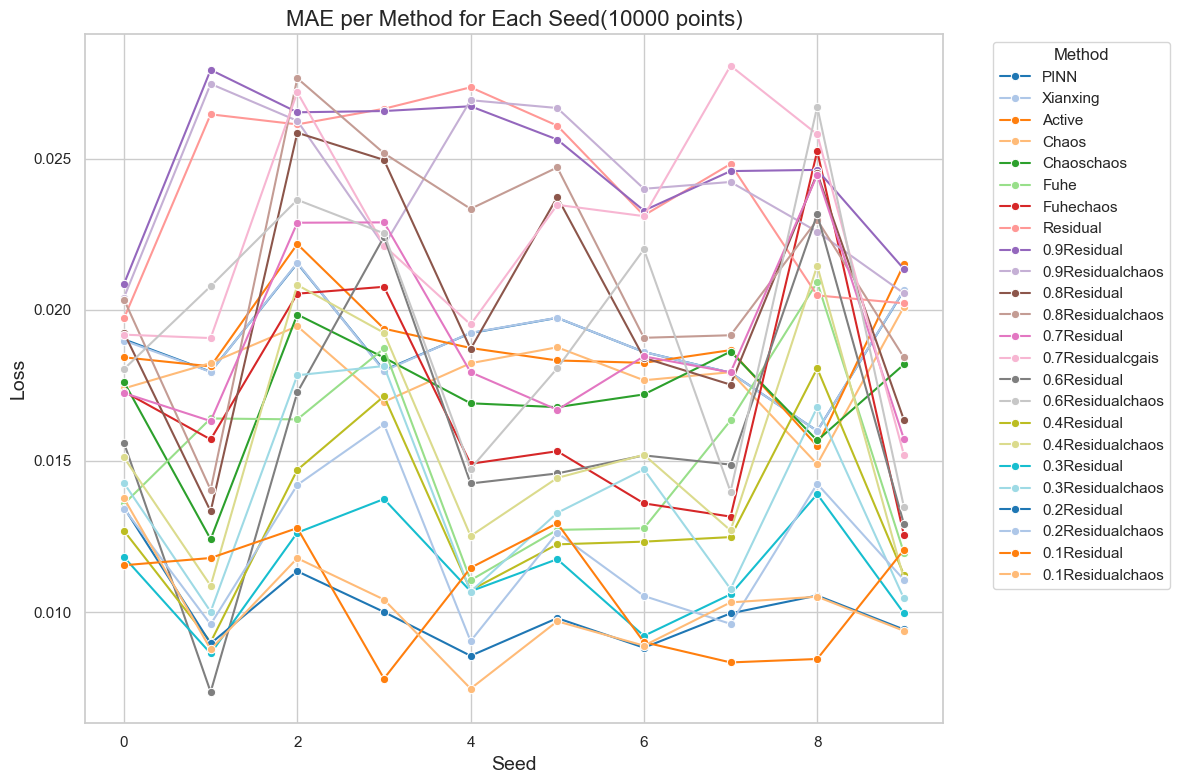

In [14]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 3. 设置图形标题和标签
plt.title('MAE per Method for Each Seed(10000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

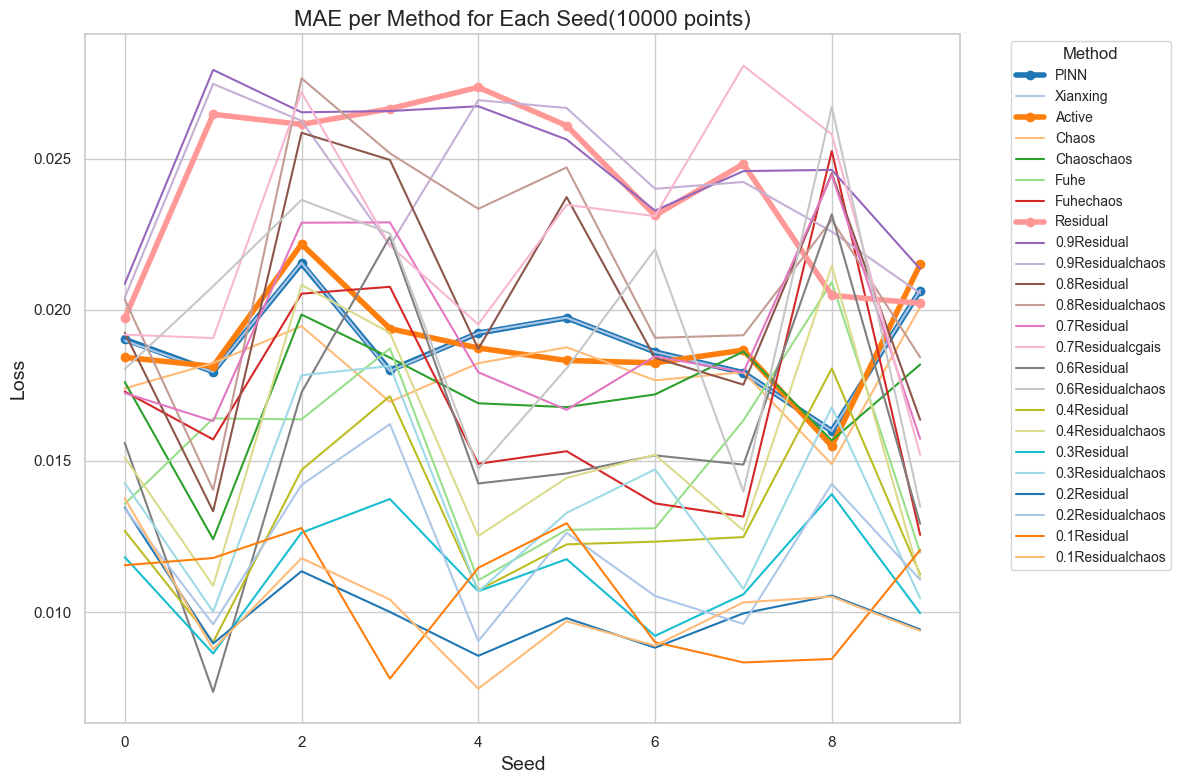

In [15]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 4. 设置图形标题和标签
plt.title('MAE per Method for Each Seed(10000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\576040693.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\576040693.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


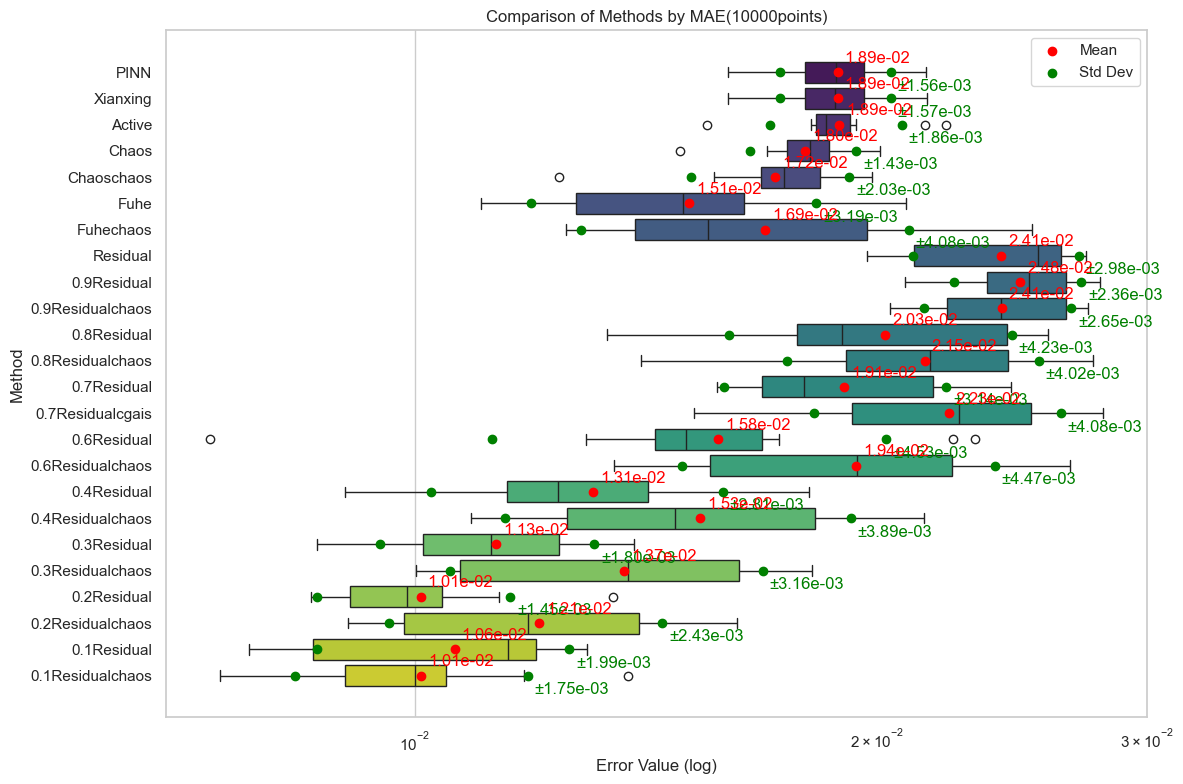

In [16]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(10000points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\617705041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\617705041.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


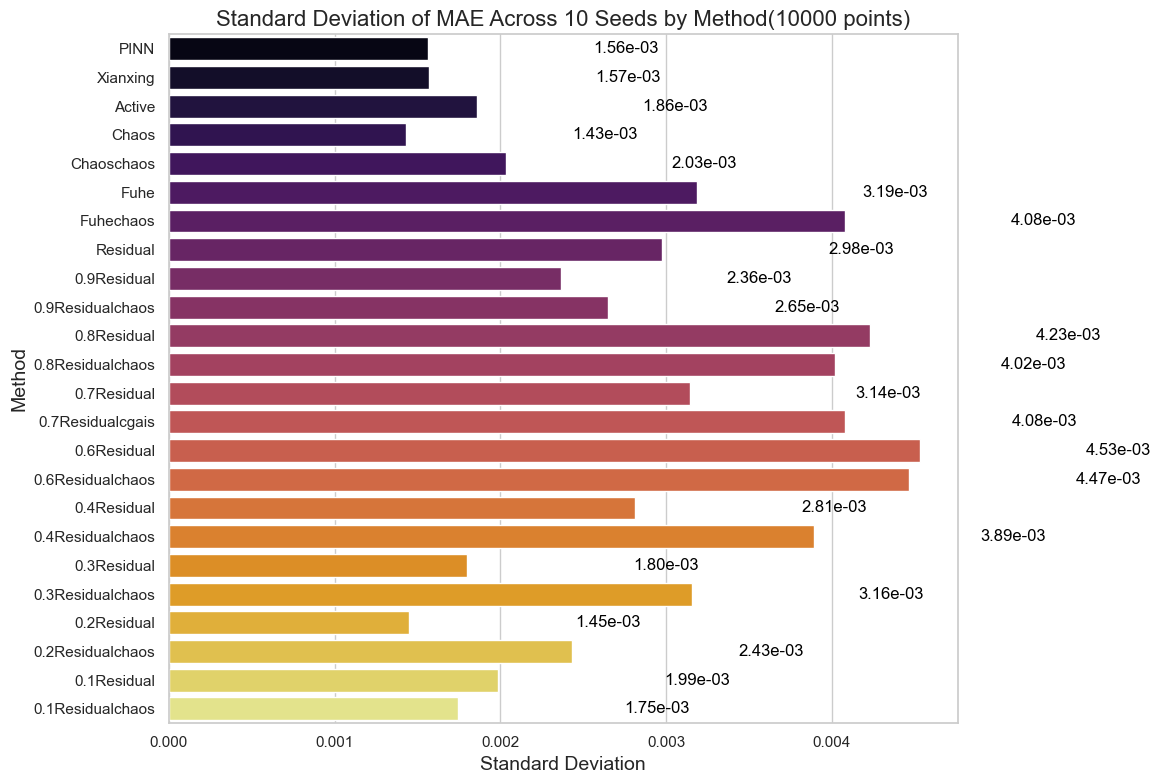

In [17]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)
# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(10000 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

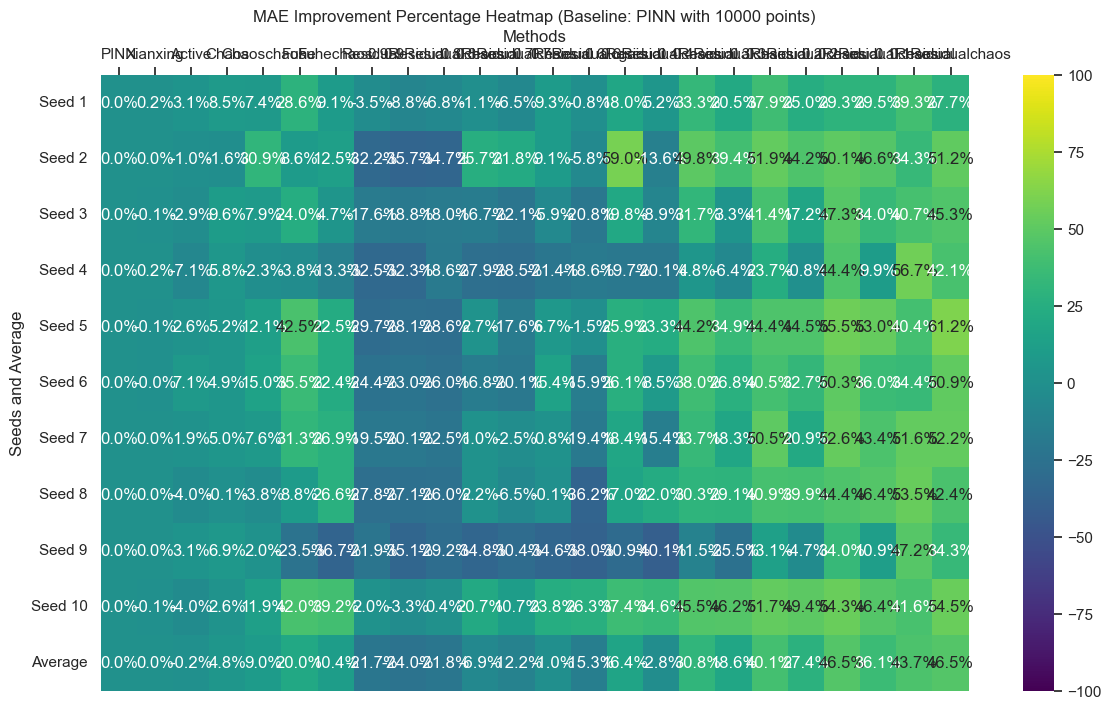

In [18]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



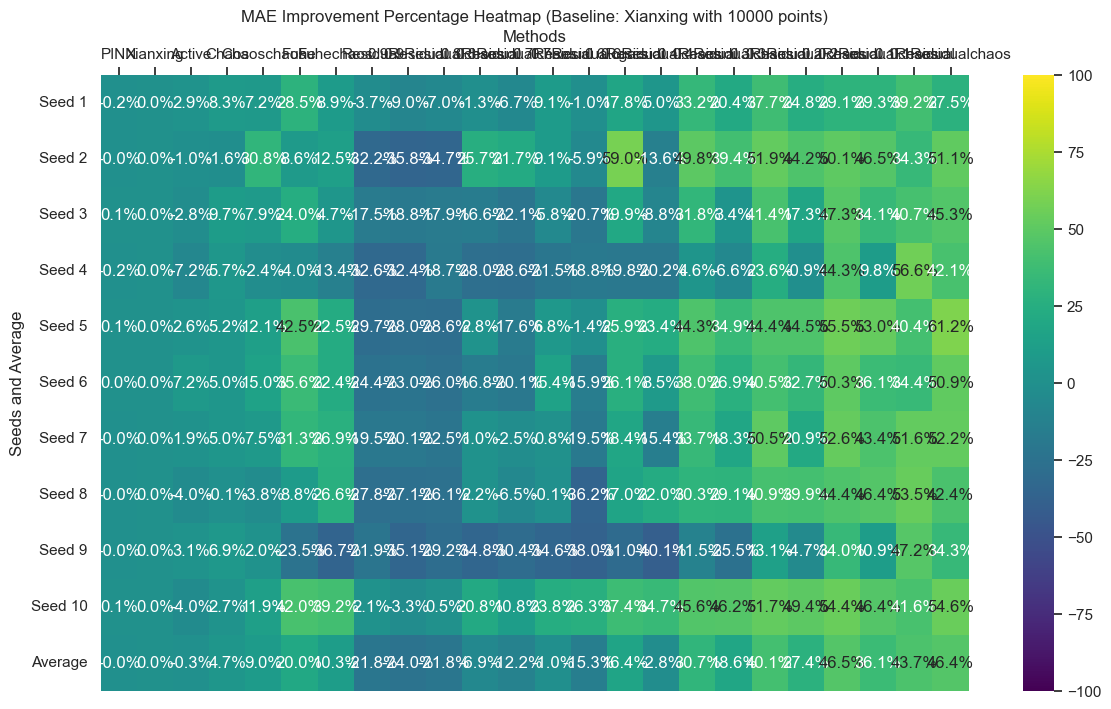

In [19]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



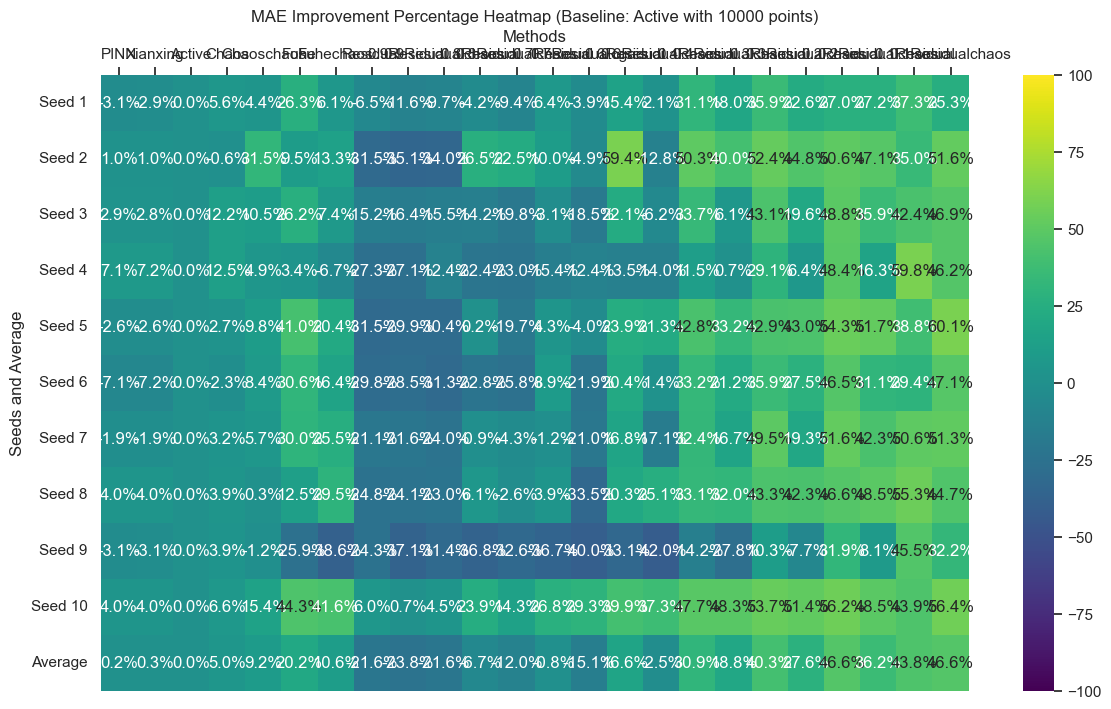

In [20]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



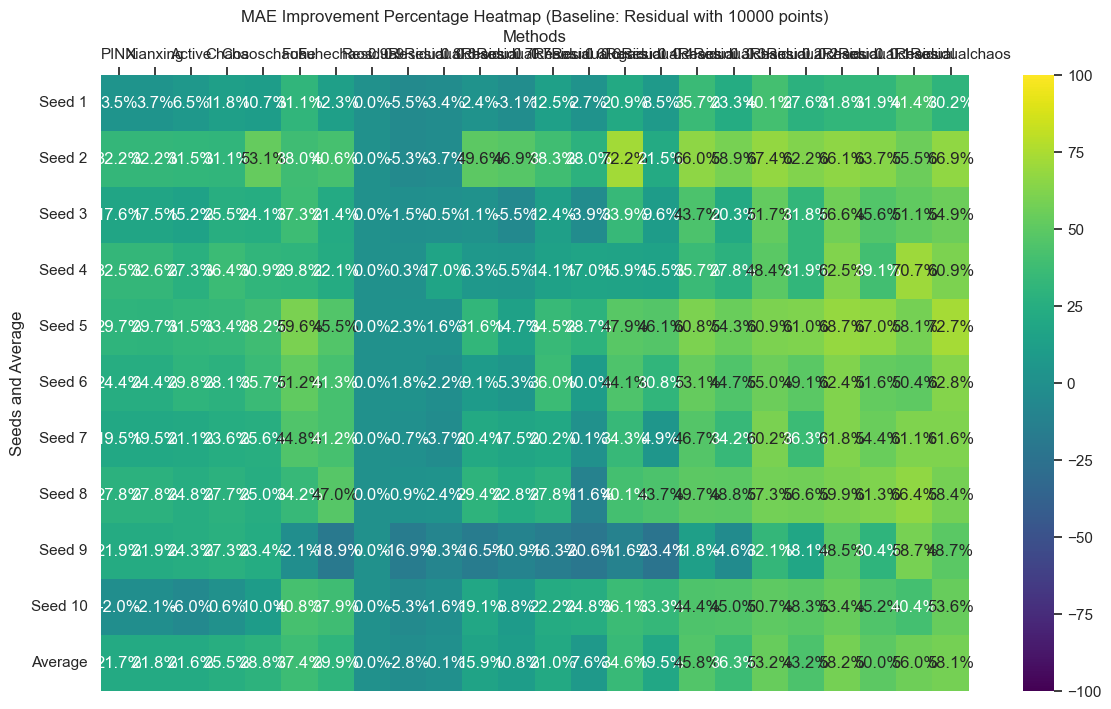

In [21]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



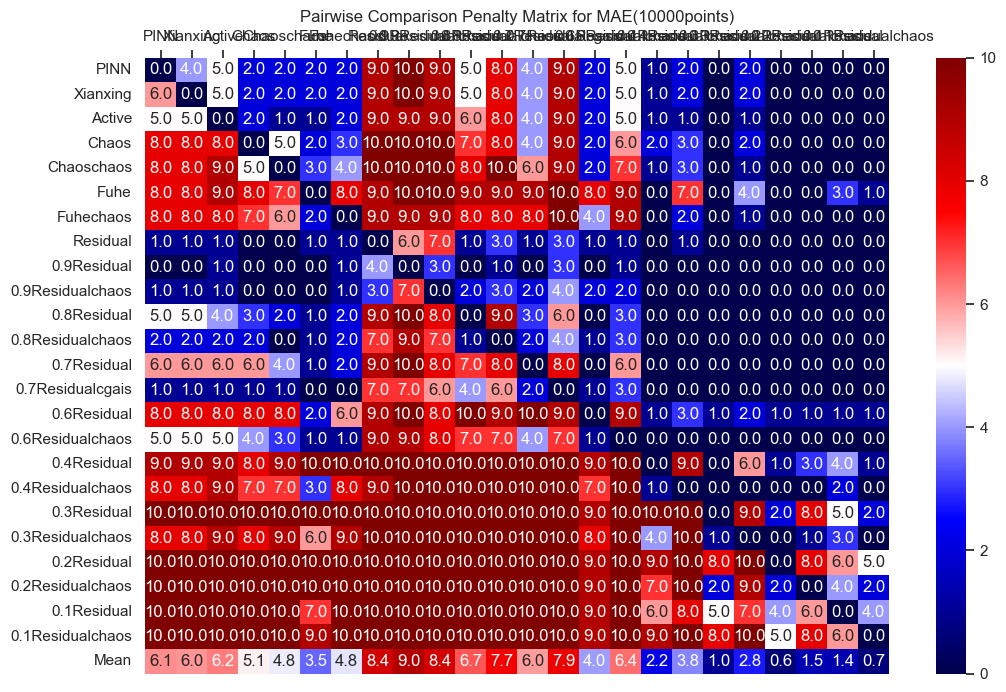

In [22]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(10000points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [23]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Chaos', 'Chaoschaos', 'Fuhe', 'Fuhechaos', 'Residual', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualcgais', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1Residualchaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.0013132559041363308, 0.0011735655715992906, 0.0016485872656403307, 0.0012595695449348192, 0.0013212923429835415, 0.001363448617654228, 0.0013991169599718621, 0.0012147940649284172, 0.0010354440496524381, 0.0016125689294354867], 'Xianxing': [0.0013084197368409725, 0.0011727558140872858, 0.001652138239717918, 0.0012562209632056736, 0.0013227351468987375, 0.0013642922250623653, 0.0013993503172451192, 0.0012147342382498063, 0.0010357096359913313, 0.001614804824885969], 'Active': [0.0011753060838444436, 0.0012123058690832029, 0.00169774919277113, 0.0015173926089804037, 0.001327

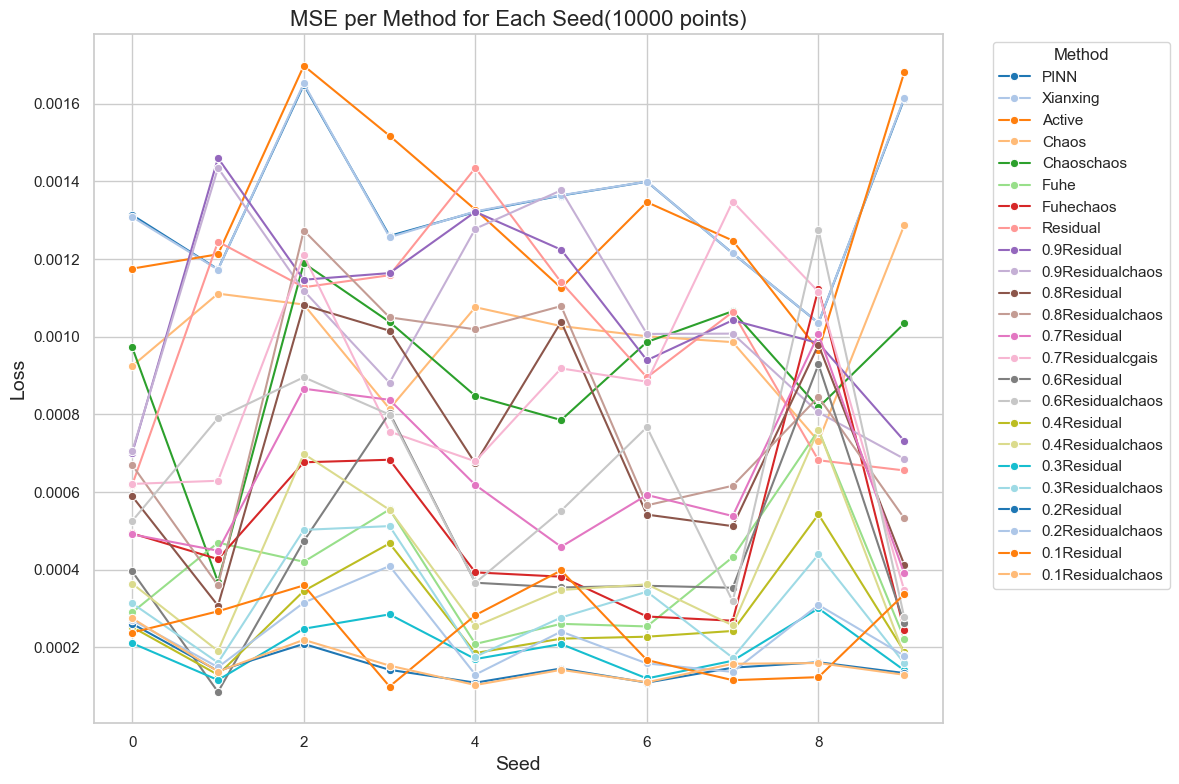

In [24]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 3. 设置图形标题和标签
plt.title('MSE per Method for Each Seed(10000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

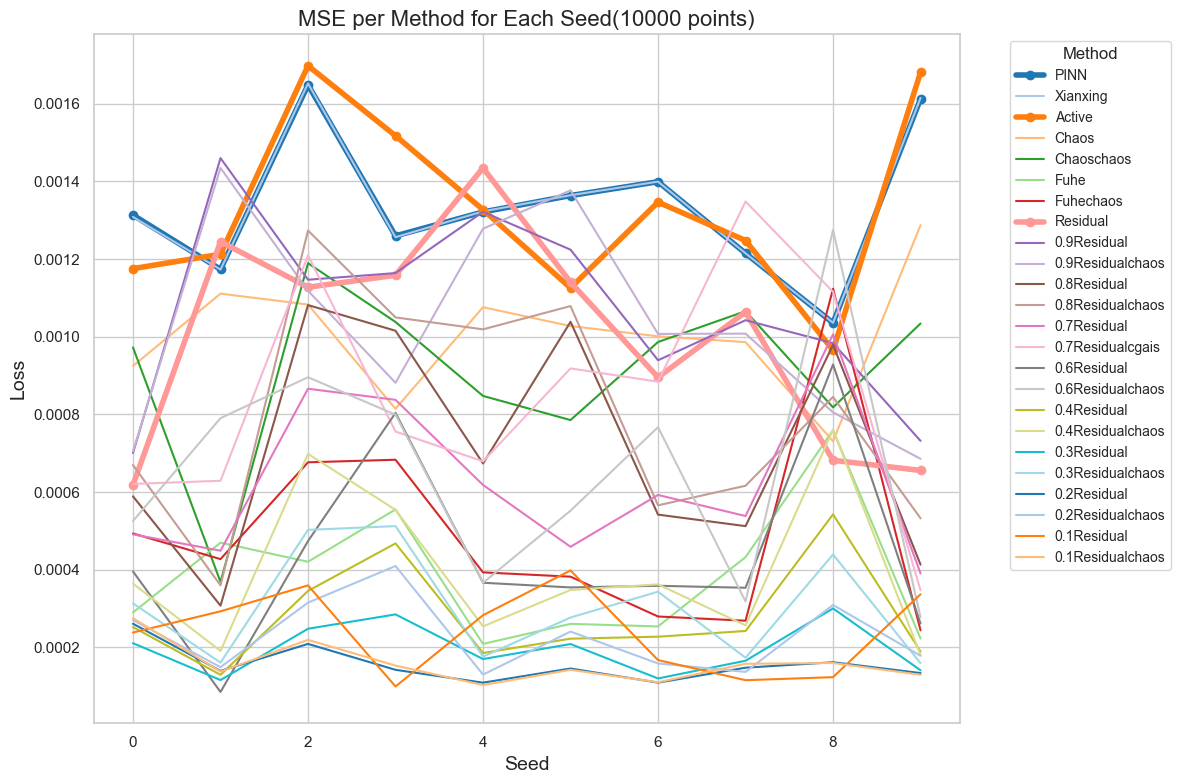

In [25]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 4. 设置图形标题和标签
plt.title('MSE per Method for Each Seed(10000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\2552067951.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\2552067951.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


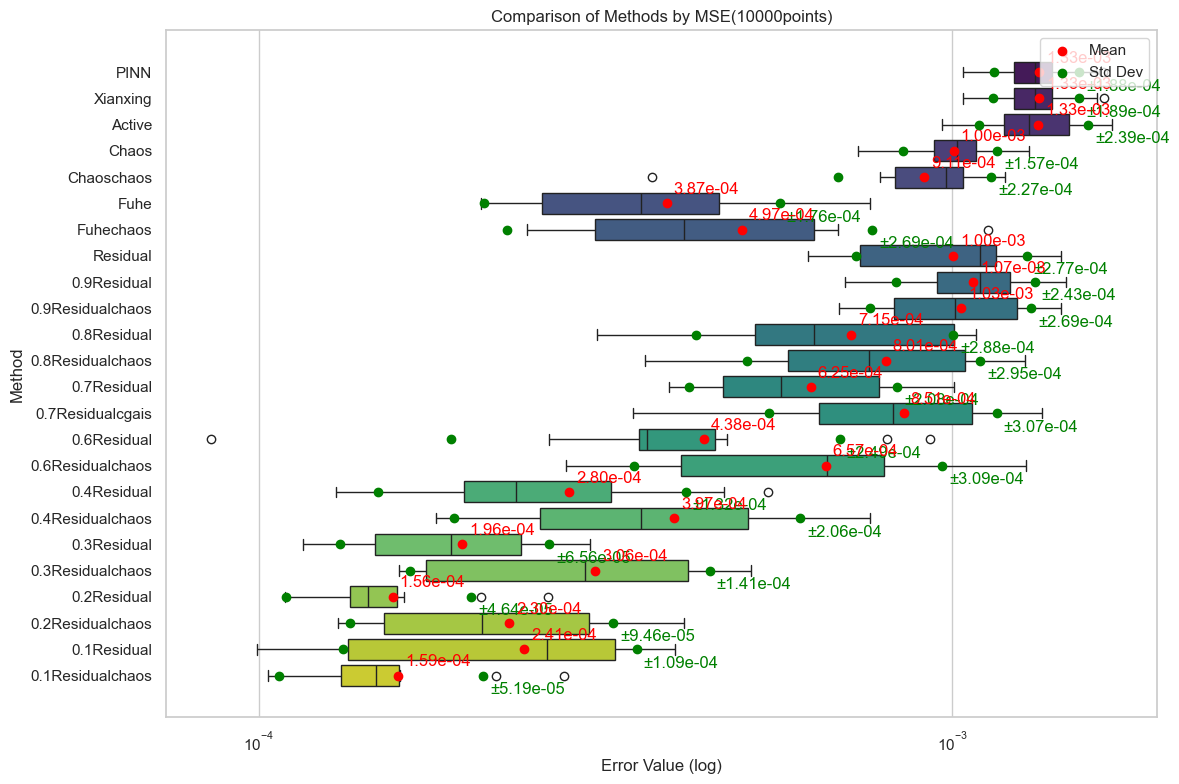

In [26]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(10000points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\82629425.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_21280\82629425.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


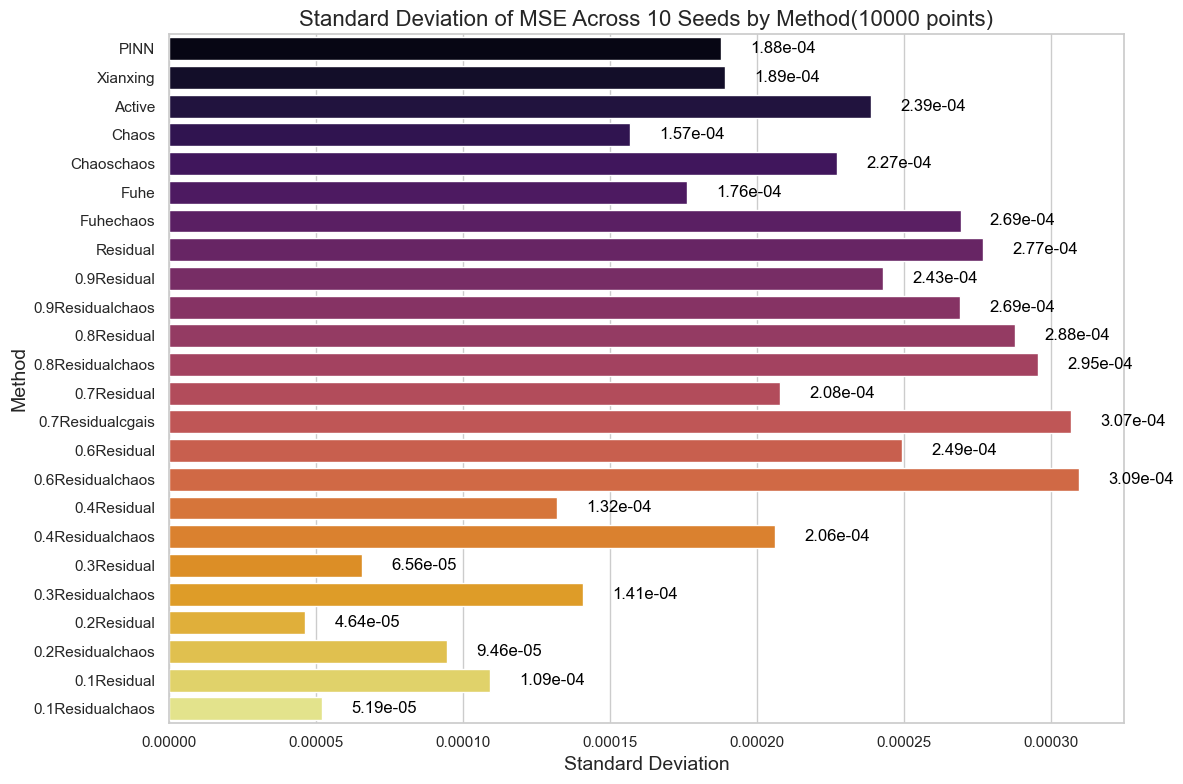

In [27]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)
# 添加标题和轴标签
plt.title('Standard Deviation of MSE Across 10 Seeds by Method(10000 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.00001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

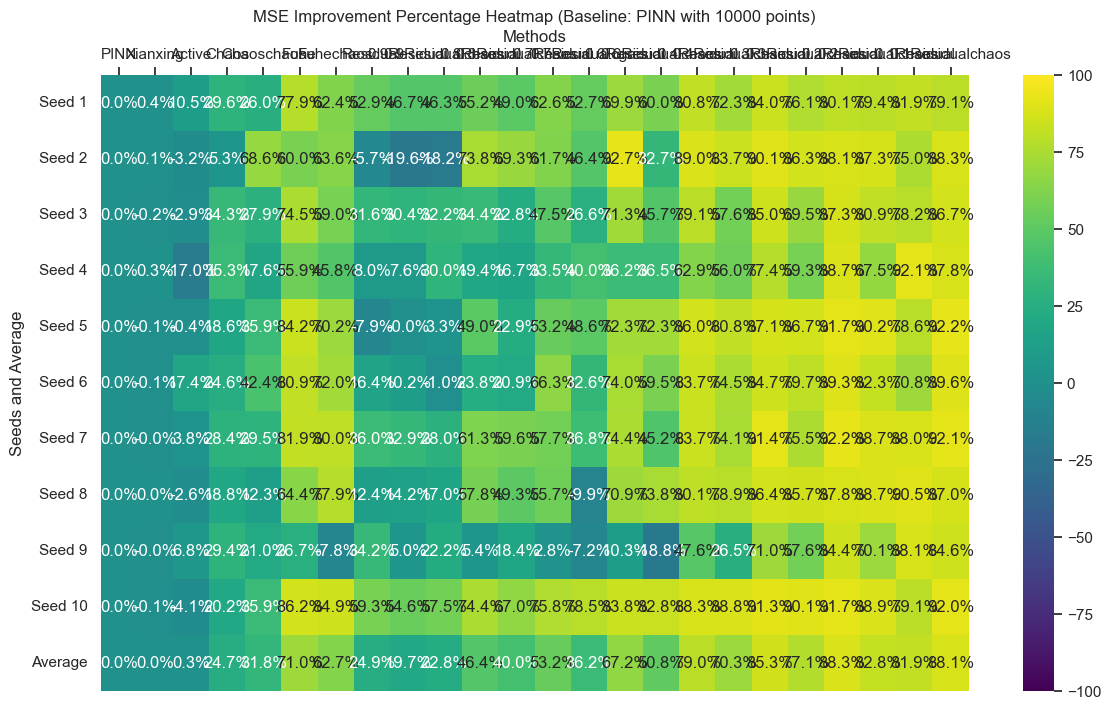

In [28]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



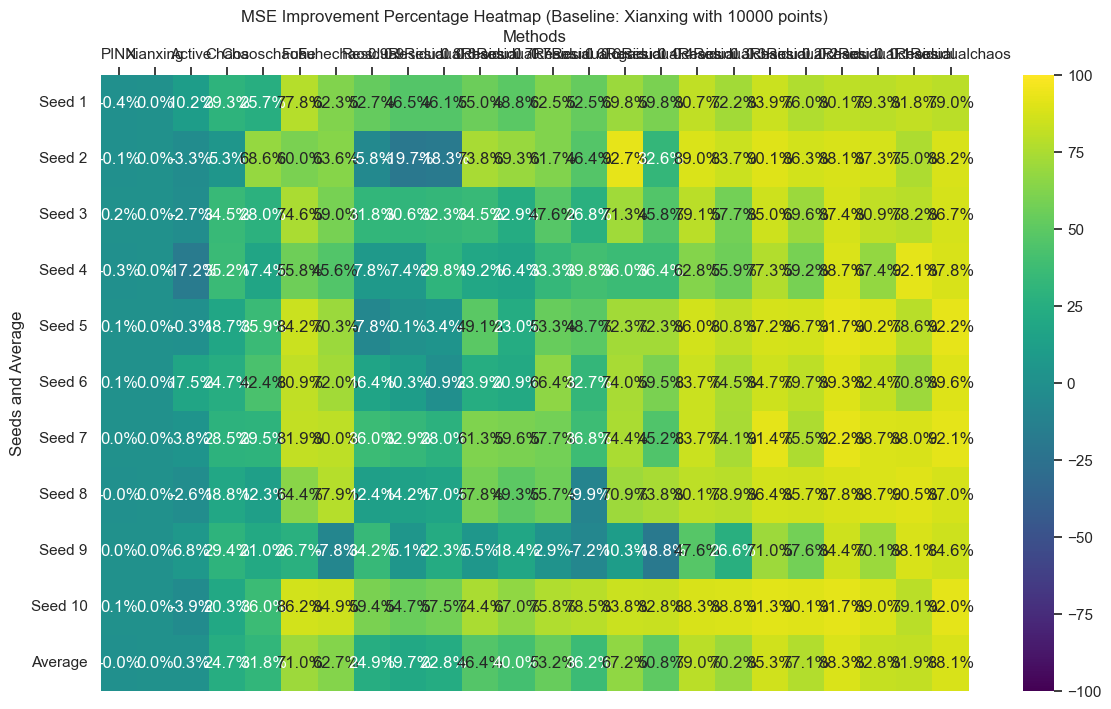

In [29]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



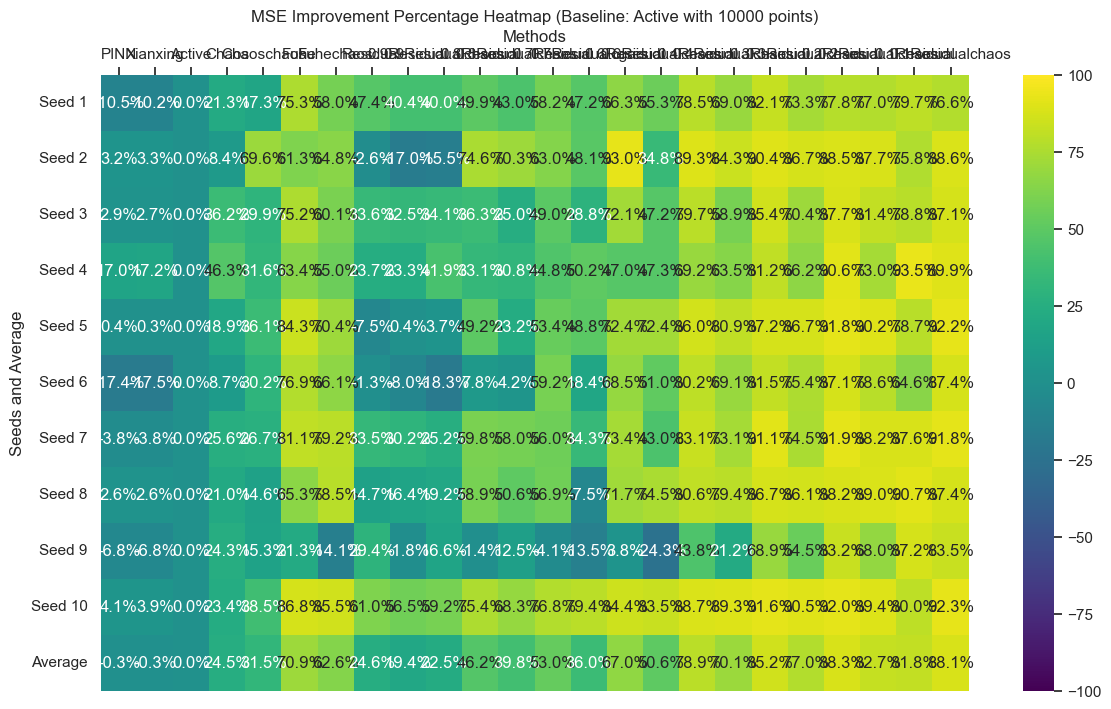

In [30]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



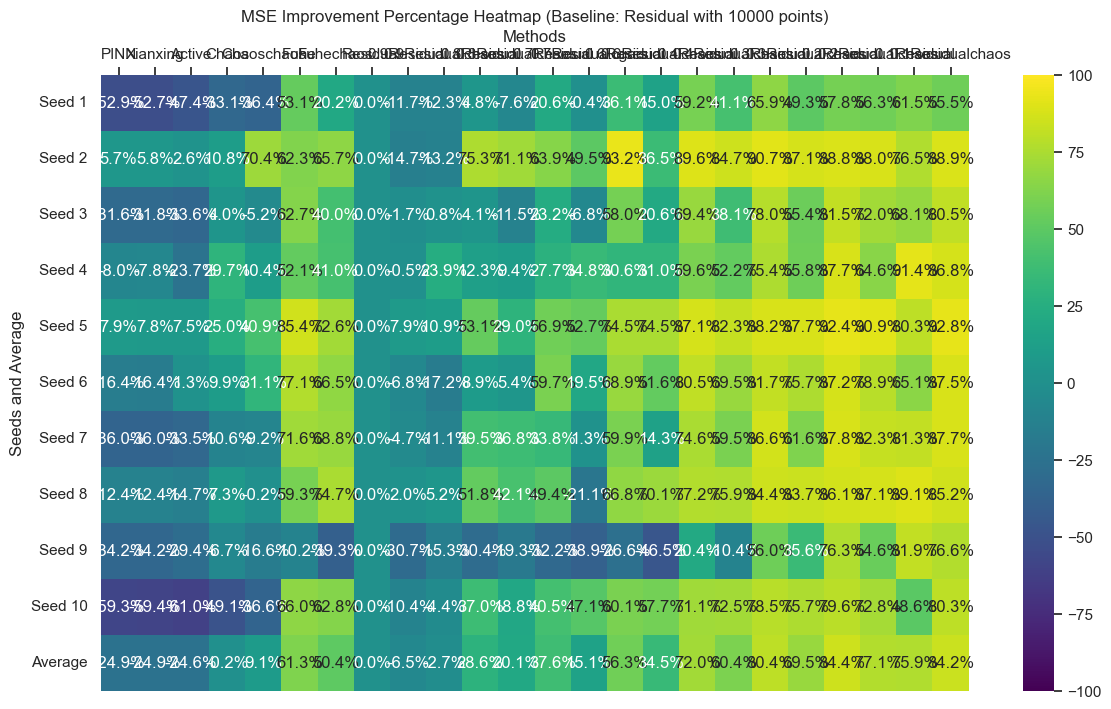

In [31]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 10000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



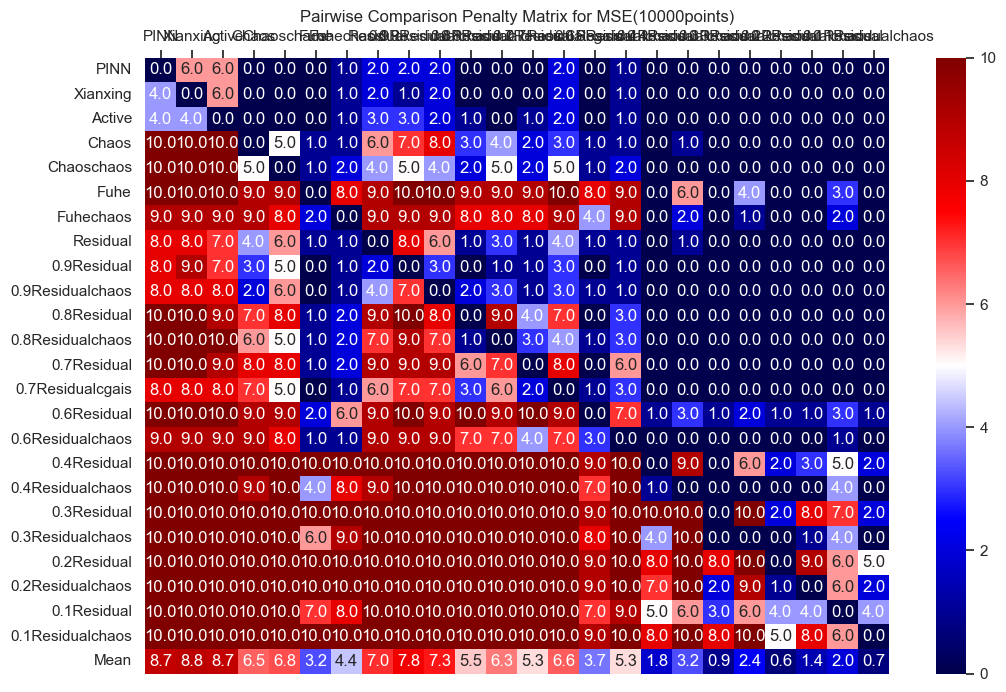

In [32]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(10000points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()
